# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

from api_keys import api_key

from citipy import citipy


## Generate Cities List

In [2]:
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)


len(cities)

611

In [3]:
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={api_key}&units={units}&q="


# For each city name in cities list
for index, city in enumerate(cities, start = 1):
    try:
        response = requests.get(query_url + city).json()
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
    
        else:
            index_counter = index_counter + 1
            
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}") 
  
    except(KeyError, IndexError):
        print("City not found. Skipping...")


Processing Record 1 of Set 1 : geraldton
Processing Record 2 of Set 1 : waipawa
Processing Record 3 of Set 1 : ushuaia
Processing Record 4 of Set 1 : hithadhoo
Processing Record 5 of Set 1 : belmonte
Processing Record 6 of Set 1 : rikitea
Processing Record 7 of Set 1 : koumac
Processing Record 8 of Set 1 : fairbanks
Processing Record 9 of Set 1 : purpe
Processing Record 10 of Set 1 : kalmunai
Processing Record 11 of Set 1 : vaini
Processing Record 12 of Set 1 : nikolskoye
Processing Record 13 of Set 1 : sergeyevka
City not found. Skipping...
Processing Record 14 of Set 1 : albany
Processing Record 15 of Set 1 : hilo
Processing Record 16 of Set 1 : chegdomyn
Processing Record 17 of Set 1 : inuvik
Processing Record 18 of Set 1 : busselton
Processing Record 19 of Set 1 : buin
City not found. Skipping...
Processing Record 20 of Set 1 : thompson
Processing Record 21 of Set 1 : maarianhamina
Processing Record 22 of Set 1 : salinopolis
Processing Record 23 of Set 1 : itoman
Processing Record 

Processing Record 39 of Set 4 : dyurtyuli
Processing Record 40 of Set 4 : tuatapere
City not found. Skipping...
Processing Record 41 of Set 4 : homer
Processing Record 42 of Set 4 : laguna
City not found. Skipping...
Processing Record 43 of Set 4 : el astillero
Processing Record 44 of Set 4 : maua
Processing Record 45 of Set 4 : jamiltepec
Processing Record 46 of Set 4 : grindavik
Processing Record 47 of Set 4 : moba
Processing Record 48 of Set 4 : harper
Processing Record 49 of Set 4 : anadyr
Processing Record 50 of Set 4 : esna
Processing Record 0 of Set 5 : sao filipe
Processing Record 1 of Set 5 : cuenca
Processing Record 2 of Set 5 : kaeo
Processing Record 3 of Set 5 : zelenoborsk
Processing Record 4 of Set 5 : luderitz
Processing Record 5 of Set 5 : deputatskiy
Processing Record 6 of Set 5 : acapulco
Processing Record 7 of Set 5 : komsomolskiy
Processing Record 8 of Set 5 : buraydah
Processing Record 9 of Set 5 : lasa
Processing Record 10 of Set 5 : hashtrud
Processing Record 11 

Processing Record 26 of Set 8 : mulege
Processing Record 27 of Set 8 : vila velha
Processing Record 28 of Set 8 : gizo
Processing Record 29 of Set 8 : grong
Processing Record 30 of Set 8 : erzin
Processing Record 31 of Set 8 : saint-georges
Processing Record 32 of Set 8 : xining
Processing Record 33 of Set 8 : svetlogorsk
Processing Record 34 of Set 8 : ikalamavony
Processing Record 35 of Set 8 : paramirim
Processing Record 36 of Set 8 : castrillon
Processing Record 37 of Set 8 : parati
Processing Record 38 of Set 8 : kismayo
Processing Record 39 of Set 8 : puerto escondido
Processing Record 40 of Set 8 : szatymaz
Processing Record 41 of Set 8 : salalah
Processing Record 42 of Set 8 : batagay
Processing Record 43 of Set 8 : qaqortoq
City not found. Skipping...
Processing Record 44 of Set 8 : katrineholm
Processing Record 45 of Set 8 : petropavlovsk-kamchatskiy
Processing Record 46 of Set 8 : naze
Processing Record 47 of Set 8 : honiara
Processing Record 48 of Set 8 : shieli
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Create a panda data frame using data retrieved
weather_dict = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})
weather_dict.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Geraldton,2,AU,1616494901,64,-28.7667,114.6000,71.60,21.85
1,Waipawa,100,NZ,1616494902,88,-41.4122,175.5153,55.40,1.14
2,Ushuaia,90,AR,1616494808,87,-54.8000,-68.3000,44.60,5.50
3,Hithadhoo,10,MV,1616494903,68,-0.6000,73.0833,83.77,7.49
4,Belmonte,20,BR,1616494904,94,-15.8631,-38.8828,73.40,4.61


In [10]:
weather_dict.describe()

,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
count,562.000000,5.620000e+02,562.000000,562.000000,562.000000,562.000000,562.000000
mean,52.241993,1.616495e+09,71.247331,19.130977,15.933855,56.161299,8.151779
std,38.984139,1.472858e+02,22.336138,34.216283,89.627328,26.826345,6.179233
min,0.000000,1.616495e+09,5.000000,-54.800000,-179.166700,-30.440000,0.360000
25%,10.000000,1.616495e+09,59.000000,-10.576125,-60.511425,41.000000,3.660000
50%,59.000000,1.616495e+09,75.000000,22.433350,20.132700,61.700000,6.690000
75%,90.000000,1.616495e+09,88.000000,47.872925,88.499275,77.000000,11.025000
max,100.000000,1.616495e+09,100.000000,78.218600,179.316700,105.800000,34.520000


In [11]:
# Save city data into a csv file
weather_dict.to_csv("../output/weather_data.csv", index = False)

# Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [19]:
weather_dict.loc[weather_dict["Humidity"]>100,:]

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [ ]:
#  Get the indices of cities that have humidity over 100%.

In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

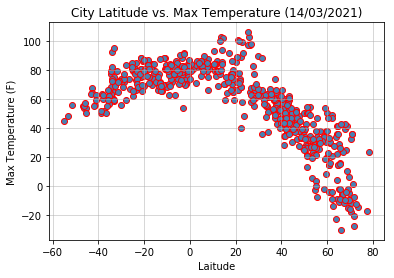

In [12]:
# Create Latitude vs. Temperature Plot scatter plot
plt.scatter(weather_dict["Lat"], weather_dict["Max Temp"], facecolor = "steelblue", edgecolor = "red")

# Set title
plt.title("City Latitude vs. Max Temperature (14/03/2021)")

# Set x axis label
plt.xlabel("Laitude")

# Set y axis label
plt.ylabel("Max Temperature (F)")

# Set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save the plotted figure as .pngs
plt.savefig("../output/City Latitude vs Max Temperature.png")

ANALYSIS: Highest temperature is found at 22 latitude and as the latidude increases or decreases, temperature drops. But when we have increasing in latitude, temperature has sharp decrease.

## Latitude vs. Humidity Plot

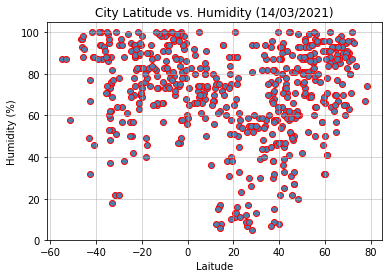

In [20]:

plt.scatter(weather_dict["Lat"], weather_dict["Humidity"], facecolor = "steelblue", edgecolor = "red")
plt.title("City Latitude vs. Humidity (14/03/2021)")
plt.xlabel("Laitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../output/City Latitude vs Humidity.png")

ANALYSIS: The lowest humidity is between 15 and 40 latitud. Polar regions have lower humidity and as latitude gets higher,humidity gets higher in southern hemisphere.

## Latitude vs. Cloudiness Plot

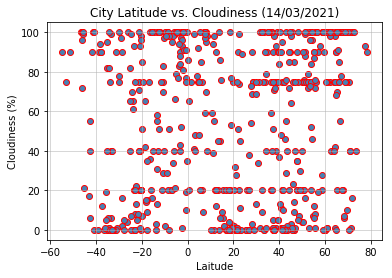

In [21]:

plt.scatter(weather_dict["Lat"], weather_dict["Cloudiness"], facecolor = "steelblue", edgecolor = "red")
plt.title("City Latitude vs. Cloudiness (14/03/2021)")
plt.xlabel("Laitude")
plt.ylabel("Cloudiness (%)")
plt.ylim(-5,105)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

plt.savefig("../output/City Latitude vs Cloudiness.png")

ANALYSIS: Cloudiness data is widely spread across the latitude.

## Latitude vs. Wind Speed Plot

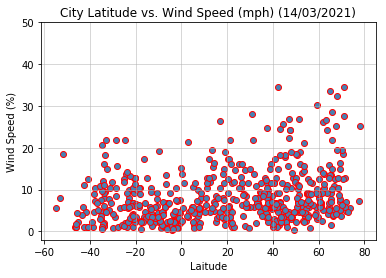

In [22]:

plt.scatter(weather_dict["Lat"], weather_dict["Wind Speed"], facecolor = "steelblue", edgecolor = "red")
plt.title("City Latitude vs. Wind Speed (mph) (14/03/2021)")
plt.xlabel("Laitude")
plt.ylabel("Wind Speed (%)")
plt.ylim(-2,50)
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)
plt.savefig("../output/City Latitude vs Wind Speed (mph).png")

ANALYSIS: The maximum wind speed is around 30 and wind speed data is widely spread across the latitude.

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8677390206178154
linear regression model is: y = -1.27x + 98.91


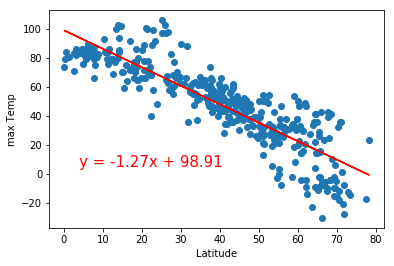

In [38]:
NH=weather_dict.loc[weather_dict["Lat"]>=0,:]


x_values = NH["Lat"]
y_values = NH["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("max Temp")
rr = round(rvalue**2,2)
print("The r-value is:",  rvalue )
print("linear regression model is:",  line_eq )
plt.annotate(line_eq,(4,5),fontsize=15,color="red")

# Save the figure
plt.savefig("../output/Northern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

ANALYSIS: There is a strong negative correlation between latitude and max temperature for northern hemisphere. 

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6121109707635899
linear regression model is: y = 0.47x + 82.76


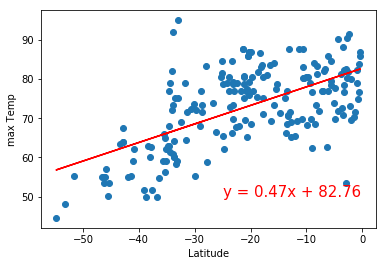

In [39]:
SH=weather_dict.loc[weather_dict["Lat"]<0,:]


x_values = SH["Lat"]
y_values = SH["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("max Temp")
rr = round(rvalue**2,2)
print("The r-value is:",  rvalue )
print("linear regression model is:",  line_eq )
plt.annotate(line_eq,(-25,50),fontsize=15,color="red")

plt.savefig("../output/Southern Hemisphere - Max Temp vs. Latitude Linear Regression.png")

ANALYSIS: There is a positive  correlation between latitude and max temperature for southern hemisphere. 

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3165769525003578
linear regression model is: y = 0.38x + 51.92


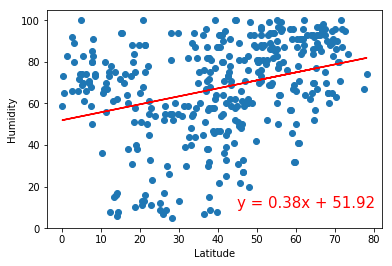

In [42]:
NH=weather_dict.loc[weather_dict["Lat"]>=0,:]


x_values = NH["Lat"]
y_values = NH["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
rr = round(rvalue**2,2)
print("The r-value is:",  rvalue )
print("linear regression model is:",  line_eq )
plt.annotate(line_eq,(45,10),fontsize=15,color="red")


plt.savefig("../output/Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")

ANALYSIS: There is a  moderate positive correlation between latitude and humidity for northern hemisphere. 

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.08123114877875945
linear regression model is: y = 0.11x + 80.65


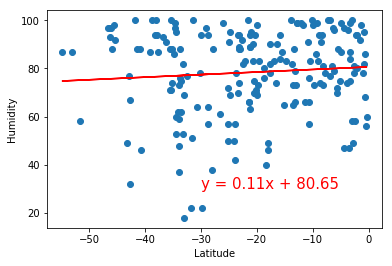

In [43]:
SH=weather_dict.loc[weather_dict["Lat"]<0,:]


x_values = SH["Lat"]
y_values = SH["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
rr = round(rvalue**2,2)
print("The r-value is:",  rvalue )
print("linear regression model is:",  line_eq )
plt.annotate(line_eq,(-30,30),fontsize=15,color="red")

plt.savefig("../output/Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression.png")


ANALYSIS: There is a weak positive correlation between latitude and humidity for southern hemisphere. 

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18478334356066622
linear regression model is: y = 0.37x + 37.49


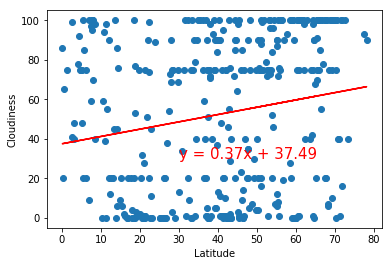

In [46]:
NH=weather_dict.loc[weather_dict["Lat"]>=0,:]


x_values = NH["Lat"]
y_values = NH["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
rr = round(rvalue**2,2)
print("The r-value is:",  rvalue )
print("linear regression model is:",  line_eq )
plt.annotate(line_eq,(30,30),fontsize=15,color="red")

plt.savefig("../output/Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

ANALYSIS: There is a moderate positive correlation between latitude and cloudiness for northern hemisphere. 

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.18589968703956988
linear regression model is: y = 0.54x + 63.21


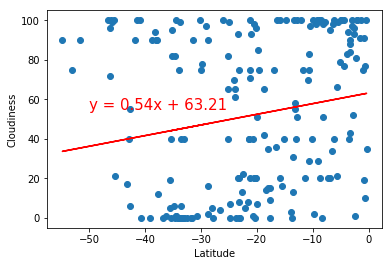

In [47]:
SH=weather_dict.loc[weather_dict["Lat"]<0,:]


x_values = SH["Lat"]
y_values = SH["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
rr = round(rvalue**2,2)
print("The r-value is:",  rvalue )
print("linear regression model is:",  line_eq )
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")

plt.savefig("../output/Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression.png")

ANALYSIS: There is a positive correlation between latitude and cloudiness for southern hemisphere. 

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.17397625883818982
linear regression model is: y = 0.06x + 6.87


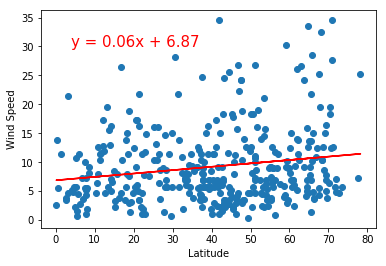

In [48]:
NH=weather_dict.loc[weather_dict["Lat"]>=0,:]


x_values = NH["Lat"]
y_values = NH["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
rr = round(rvalue**2,2)
print("The r-value is:",  rvalue )
print("linear regression model is:",  line_eq )
plt.annotate(line_eq,(4,30),fontsize=15,color="red")

plt.savefig("../output/Northern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

ANALYSIS: There is a weak positive correlation between latitude and windspeed for northern hemisphere. 

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.15928737670004656
linear regression model is: y = -0.06x + 4.91


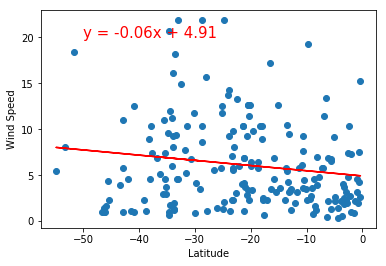

In [49]:
SH=weather_dict.loc[weather_dict["Lat"]<0,:]


x_values = SH["Lat"]
y_values = SH["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
rr = round(rvalue**2,2)
print("The r-value is:",  rvalue )
print("linear regression model is:",  line_eq )
plt.annotate(line_eq,(-50,20),fontsize=15,color="red")

plt.savefig("../output/Southern Hemisphere - Wind Speed vs. Latitude Linear Regression.png")

ANALYSIS: There is a weak negative correlation between latitude and wind speed for southern hemisphere. 